## Uniswap Constant Product Pool Price Investigation ##

`x * y = k`

k(x,y) is the constant value function for two token quantities x and y

In [1]:
mutable struct Pool
    x
    y
end

k(pool::Pool) = pool.x * pool.y

k (generic function with 1 method)

swapA adds a quantity of token X to the pool and returns the quantity of token Y removed from the pool

In [2]:
function swapX(pool::Pool, x)
    pool_value = k(pool)
    new_pool_x = pool.x + x
    new_pool_y = pool_value / new_pool_x
    remainder = pool.y - new_pool_y
    pool.x = new_pool_x
    pool.y = new_pool_y
    remainder
end

swapX (generic function with 1 method)

Initial pool of 200 X(DAI) and 2 Y(ETH)

In [3]:
pool = Pool(200.0, 2.0)

Pool(200.0, 2.0)

add a quantity of X tokens to the pool and compute the resultant price of Y

In [4]:
using Printf
function addX(pool::Pool, x)
    remainder = swapX(pool, x)
    price = x/remainder
    @printf("pool: DAI:%f ETH:%f price: %f\n", pool.x, pool.y, price)
    price
end

addX (generic function with 1 method)

make 5 deposits of 10 DAI and graph the price of ETH

In [5]:
time = 1:5
prices = map(x -> addX(pool, 10), time)
""

pool: DAI:210.000000 ETH:1.904762 price: 105.000000
pool: DAI:220.000000 ETH:1.818182 price: 115.500000
pool: DAI:230.000000 ETH:1.739130 price: 126.500000
pool: DAI:240.000000 ETH:1.666667 price: 138.000000
pool: DAI:250.000000 ETH:1.600000 price: 150.000000


""

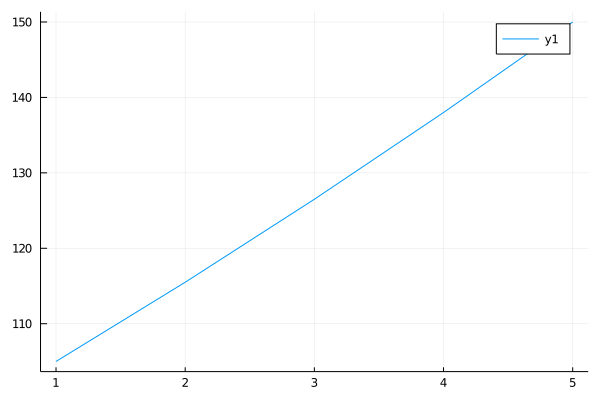

In [6]:
using Plots
plot(prices)